In [4]:
# ----- Import Packages -----

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

# ----- Read Data -----

cdfs = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cdfs', 'cdfs_in_df.csv'))

# ----- Define Plot Function -----

def lacy1(condition, val, geq = None, leq = None, save_path = None):

    # Create a single subplot
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

    # Define Plot Parameters
    xd, yd = '58_36', '80_45'
    xlim, ylim = [-1, 1.5], [-1, 1.5]
    xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

    x1 = np.linspace(-0.1, 1.5, 100)
    y1, y2 = -0.2, 0.8 * x1 + 0.5

    # Define KDE and Scatter Parameters
    kde_params = {'cmap': 'Greys', 'fill': False, 'alpha': 0.7, 'zorder': 0, 'linewidths': 2}
    b_param, bw_param = {'s': 180, 'color': 'xkcd:periwinkle blue', 'marker': 's', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 230, 'color': 'xkcd:white', 'marker': 's', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
    g_param, gw_param = {'s': 160, 'color': 'xkcd:hospital green', 'marker': 'D', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 210, 'color': 'xkcd:white', 'marker': 'D', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
    r_param, rw_param = {'s': 150, 'color': 'xkcd:salmon', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 200, 'color': 'xkcd:white', 'marker': 'o', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}

    rgb_params, w_params = [b_param, g_param, r_param], [bw_param, gw_param, rw_param]
    
    agn_types, agn_labels = ['xray_agn', 'radio_agn', 'ir_agn'], {'xray_agn': 'X-Ray AGN', 'radio_agn': 'Radio AGN', 'ir_agn': 'Infrared AGN'}

    # Apply Conditions
    
    if geq is True and leq is None:
        cdfs_filtered = cdfs[cdfs[condition] >= val]
    elif leq is True and geq is None:
        cdfs_filtered = cdfs[cdfs[condition] <= val]
    elif geq is None and leq is None:
        cdfs_filtered = cdfs[cdfs[condition] == val]
    else:
        cdfs_filtered = cdfs  # Default case if no condition is met

    # Plotting for CDFS
    print("Doing plot for CDFS")

    # Density Plot
    sns.kdeplot(x = xd, y = yd, data = cdfs_filtered[cdfs_filtered['agn'] == 0], warn_singular = False, **kde_params, ax = ax)

    # Scatter Plots
    print("\t scatterplot..." )
    for agn_type, w_param in zip(agn_types, w_params):
        ax.scatter(
            x = cdfs_filtered.loc[cdfs_filtered[agn_type] == 1, xd],
            y = cdfs_filtered.loc[cdfs_filtered[agn_type] == 1, yd],
            **w_param
        )

    for agn_type, rgb_param in zip(agn_types, rgb_params):
        ax.scatter(
            x = cdfs_filtered.loc[(cdfs_filtered[agn_type] == 1), xd],
            y = cdfs_filtered.loc[(cdfs_filtered[agn_type] == 1), yd],
            label = agn_labels.get(agn_type, agn_type),
            **rgb_param
        )

    # ----- Aesthetics -----
        
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")
    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)
    ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2)
    ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)
    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]
    for x, y in lines:
        ax.plot(x, y, **line_params_white)
    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, 'CDFS', fontsize = 20, ha = 'right')

    df_agn1 = cdfs_filtered[cdfs_filtered['agn'] == 1]
    df_agn0 = cdfs_filtered[cdfs_filtered['agn'] == 0]

    ax.text(-0.9, -0.75, f'N$_{{AGN}}$ = {len(df_agn1)}', fontsize = 15, ha = 'left')
    ax.text(-0.9, -0.9, f'N$_{{SFG}}$ = {len(df_agn0)}', fontsize = 15, ha = 'left')

    ax.set_xlabel('$log (S_{8.0}/S_{4.5})$', size = '20')
    ax.set_ylabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax.legend(loc = 'upper left', fontsize = '20', frameon = True)

    if save_path:
        fig.savefig(save_path, bbox_inches = 'tight', dpi = 300, transparent = False)

    plt.show()


Doing plot for CDFS
	 scatterplot...


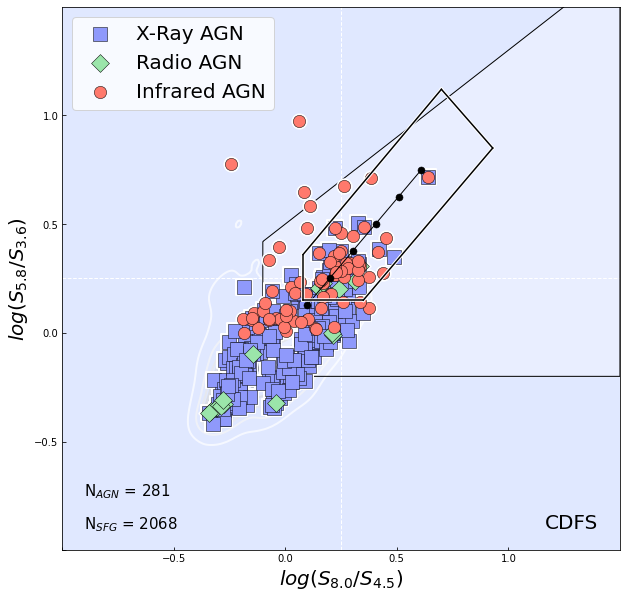

In [10]:
path = '/Users/jess/Desktop/lacy_test.png'

lacy1('HR', 10, leq = True, save_path = path)

In [ ]:
# ----- Import Packages -----

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

# ----- Read Data -----

cdfs = pd.read_csv(os.path.join('/', 'Users', 'jess', 'Desktop', 'data', 'raw', 'cdfs', 'cdfs_in_df.csv'))

# ----- Define Plot Function -----

def lacy1(condition, val, geq = None, leq = None, save_path = None):

    # Create a single subplot
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))

    # Define Plot Parameters
    xd, yd = '58_36', '24_58'
    xlim, ylim = [-1, 1.5], [-1, 1.5]
    xtick, ytick = np.arange(-1, 1.5, 0.5), np.arange(-1, 1.5, 0.5)

    x1 = np.linspace(-0.1, 1.5, 100)
    y1, y2 = -0.2, 0.8 * x1 + 0.5

    # Define KDE and Scatter Parameters
    kde_params = {'cmap': 'Greys', 'fill': False, 'alpha': 0.7, 'zorder': 0, 'linewidths': 2}
    b_param, bw_param = {'s': 180, 'color': 'xkcd:periwinkle blue', 'marker': 's', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 230, 'color': 'xkcd:white', 'marker': 's', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
    g_param, gw_param = {'s': 160, 'color': 'xkcd:hospital green', 'marker': 'D', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 210, 'color': 'xkcd:white', 'marker': 'D', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}
    r_param, rw_param = {'s': 150, 'color': 'xkcd:salmon', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 3}, {'s': 200, 'color': 'xkcd:white', 'marker': 'o', 'edgecolor': 'w', 'linewidth': 2, 'zorder': 3}

    rgb_params, w_params = [b_param, g_param, r_param], [bw_param, gw_param, rw_param]
    
    agn_types, agn_labels = ['xray_agn', 'radio_agn', 'ir_agn'], {'xray_agn': 'X-Ray AGN', 'radio_agn': 'Radio AGN', 'ir_agn': 'Infrared AGN'}

    # Apply Conditions
    
    if geq is True and leq is None:
        cdfs_filtered = cdfs[cdfs[condition] >= val]
    elif leq is True and geq is None:
        cdfs_filtered = cdfs[cdfs[condition] <= val]
    elif geq is None and leq is None:
        cdfs_filtered = cdfs[cdfs[condition] == val]
    else:
        cdfs_filtered = cdfs  # Default case if no condition is met

    # Plotting for CDFS
    print("Doing plot for CDFS")

    # Density Plot
    sns.kdeplot(x = xd, y = yd, data = cdfs_filtered[cdfs_filtered['agn'] == 0], warn_singular = False, **kde_params, ax = ax)

    # Scatter Plots
    print("\t scatterplot..." )
    for agn_type, w_param in zip(agn_types, w_params):
        ax.scatter(
            x = cdfs_filtered.loc[cdfs_filtered[agn_type] == 1, xd],
            y = cdfs_filtered.loc[cdfs_filtered[agn_type] == 1, yd],
            **w_param
        )

    for agn_type, rgb_param in zip(agn_types, rgb_params):
        ax.scatter(
            x = cdfs_filtered.loc[(cdfs_filtered[agn_type] == 1), xd],
            y = cdfs_filtered.loc[(cdfs_filtered[agn_type] == 1), yd],
            label = agn_labels.get(agn_type, agn_type),
            **rgb_param
        )

    # ----- Aesthetics -----
        
    ax.set_xlim(xlim); ax.set_ylim(ylim)
    ax.set_xticks(xtick); ax.set_yticks(ytick)

    xticks = ax.xaxis.get_major_ticks(); yticks = ax.yaxis.get_major_ticks()
    xticks[0].label1.set_visible(False); yticks[0].label1.set_visible(False)

    ax.tick_params(axis = "x", direction = "in"); ax.tick_params(axis = "y", direction = "in")
    ax.set_facecolor('#e0e8ff')

    ax.axhline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)
    ax.axvline(0.25, color = 'w', linewidth = 1, linestyle = '--', zorder = 1)

    # ----- Lacy Diagnostic -----

    ax.fill_between(x1, y1, y2, color = 'w', alpha = 0.3, zorder = 2)
    ax.fill_between(x1, y1, y2, color = 'none', edgecolor = 'black', alpha = 1, zorder = 2)

    # ----- Donley Power-Law -----

    line_params_black = {'color': 'black', 'linewidth': 1.5, 'linestyle': '-', 'zorder': 5}
    line_params_white = {'color': 'white', 'linewidth': 3.5, 'linestyle': '-', 'zorder': 5}
    scatter_params = {'s': 50, 'color': 'black', 'marker': 'o', 'edgecolor': 'k', 'linewidth': 0.5, 'zorder': 5}

    ax.plot([0.1, 0.61], [0.13, 0.75], color = 'black', linewidth = 1, linestyle = '-', zorder = 5)
    ax.scatter([0.1, 0.202, 0.304, 0.406, 0.508, 0.61], [0.13, 0.254, 0.378, 0.502, 0.626, 0.75], **scatter_params)

    lines = [([0.35, 0.93], [0.15, 0.85]), ([0.93, 0.7], [0.85, 1.12]), ([0.7, 0.08], [1.12, 0.36]), ([0.08, 0.08], [0.36, 0.15]), ([0.08, 0.35], [0.15, 0.15])]
    for x, y in lines:
        ax.plot(x, y, **line_params_white)
    for x, y in lines:
        ax.plot(x, y, **line_params_black)

    # ----- Labels -----

    ax.text(1.4, -0.9, 'CDFS', fontsize = 20, ha = 'right')

    df_agn1 = cdfs_filtered[cdfs_filtered['agn'] == 1]
    df_agn0 = cdfs_filtered[cdfs_filtered['agn'] == 0]

    ax.text(-0.9, -0.75, f'N$_{{AGN}}$ = {len(df_agn1)}', fontsize = 15, ha = 'left')
    ax.text(-0.9, -0.9, f'N$_{{SFG}}$ = {len(df_agn0)}', fontsize = 15, ha = 'left')

    ax.set_xlabel('$log (S_{8.0}/S_{4.5})$', size = '20')
    ax.set_ylabel('$log (S_{5.8}/S_{3.6})$', size = '20')

    ax.legend(loc = 'upper left', fontsize = '20', frameon = True)

    if save_path:
        fig.savefig(save_path, bbox_inches = 'tight', dpi = 300, transparent = False)

    plt.show()
